# Part C
---
**Name:**       Ong Zheng Kai  
**Student ID:** p2004048  
**Class:**      DAAA 2A04   

**Data Source:** [Data on COVID-19](https://github.com/owid/covid-19-data/tree/master/public/data)

## Problem Statement
### Using past COVID-19 Dataset to forecast number of new cases and deaths
<br>

## Objective
### *To forecast the number of new cases and deaths with the given set of features.*   
<br>

## *Why is this task very important?*


In [1]:
from IPython.display import display, Markdown

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mtd
import seaborn as sb

In [2]:
covid = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
covid = covid[covid['iso_code'] == 'SGP']

covid.index = pd.to_datetime(covid['date'], format='%Y-%m-%d')
covid = covid.drop(columns=['date'])[:'2021-08-09']

## Basic EDA
Let us first take a look at some basic information of our dataset!

In [3]:
covid.shape

(565, 61)

In [4]:
covid.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
date,,,,,,,,,,,,,,,,,,,,,
2020-01-23,SGP,Asia,Singapore,1.0,1.0,NaN,NaN,NaN,NaN,0.171,...,NaN,92.243,10.99,5.2,28.3,NaN,2.4,83.62,0.938,NaN
2020-01-24,SGP,Asia,Singapore,3.0,2.0,NaN,NaN,NaN,NaN,0.513,...,NaN,92.243,10.99,5.2,28.3,NaN,2.4,83.62,0.938,NaN
2020-01-25,SGP,Asia,Singapore,3.0,0.0,NaN,NaN,NaN,NaN,0.513,...,NaN,92.243,10.99,5.2,28.3,NaN,2.4,83.62,0.938,NaN
2020-01-26,SGP,Asia,Singapore,4.0,1.0,NaN,NaN,NaN,NaN,0.684,...,NaN,92.243,10.99,5.2,28.3,NaN,2.4,83.62,0.938,NaN
2020-01-27,SGP,Asia,Singapore,5.0,1.0,NaN,NaN,NaN,NaN,0.855,...,NaN,92.243,10.99,5.2,28.3,NaN,2.4,83.62,0.938,NaN


In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 565 entries, 2020-01-23 to 2021-08-09
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               565 non-null    object 
 1   continent                              565 non-null    object 
 2   location                               565 non-null    object 
 3   total_cases                            565 non-null    float64
 4   new_cases                              565 non-null    float64
 5   new_cases_smoothed                     560 non-null    float64
 6   total_deaths                           507 non-null    float64
 7   new_deaths                             507 non-null    float64
 8   new_deaths_smoothed                    560 non-null    float64
 9   total_cases_per_million                565 non-null    float64
 10  new_cases_per_million                  565 non-null    

In [6]:
covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,565.000000,565.000000,560.000000,507.000000,507.000000,560.000000,565.000000,565.000000,560.000000,507.000000,...,0.0,565.000,5.650000e+02,565.0,5.650000e+02,0.0,565.0,565.00,5.650000e+02,18.000000
mean,46059.380531,116.523894,117.119377,27.238659,0.082840,0.072491,7872.936791,19.917465,20.019214,4.655874,...,NaN,92.243,1.099000e+01,5.2,2.830000e+01,NaN,2.4,83.62,9.380000e-01,7.749444
std,22232.876814,207.600796,198.762601,7.019752,0.296624,0.142234,3800.268919,35.485225,33.974544,1.199855,...,NaN,0.000,1.777931e-15,0.0,7.111724e-15,NaN,0.0,0.00,1.111207e-16,5.305939
min,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.171000,0.000000,0.171000,0.342000,...,NaN,92.243,1.099000e+01,5.2,2.830000e+01,NaN,2.4,83.62,9.380000e-01,-3.110000
25%,39850.000000,10.000000,10.714000,27.000000,0.000000,0.000000,6811.566000,1.709000,1.831000,4.615000,...,NaN,92.243,1.099000e+01,5.2,2.830000e+01,NaN,2.4,83.62,9.380000e-01,5.237500
50%,58015.000000,24.000000,25.143000,29.000000,0.000000,0.000000,9916.513000,4.102000,4.297500,4.957000,...,NaN,92.243,1.099000e+01,5.2,2.830000e+01,NaN,2.4,83.62,9.380000e-01,7.910000
75%,60196.000000,111.000000,118.714500,30.000000,0.000000,0.143000,10289.311000,18.973000,20.292000,5.128000,...,NaN,92.243,1.099000e+01,5.2,2.830000e+01,NaN,2.4,83.62,9.380000e-01,10.730000
max,65836.000000,1426.000000,1005.143000,42.000000,2.000000,0.857000,11253.357000,243.746000,171.809000,7.179000,...,NaN,92.243,1.099000e+01,5.2,2.830000e+01,NaN,2.4,83.62,9.380000e-01,17.710000


In [7]:
covid.isna().sum()

iso_code                        0
continent                       0
location                        0
total_cases                     0
new_cases                       0
                             ... 
handwashing_facilities        565
hospital_beds_per_thousand      0
life_expectancy                 0
human_development_index         0
excess_mortality              547
Length: 61, dtype: int64

---

## Visualizations EDA 📊

In [8]:
# Basic Initialization ⚙
blue = '#4586FF'
red = '#FC5C9C'
yellow = '#eac100'
orange = '#F77B4D'
green = '#17b978'
gray = '#898989'

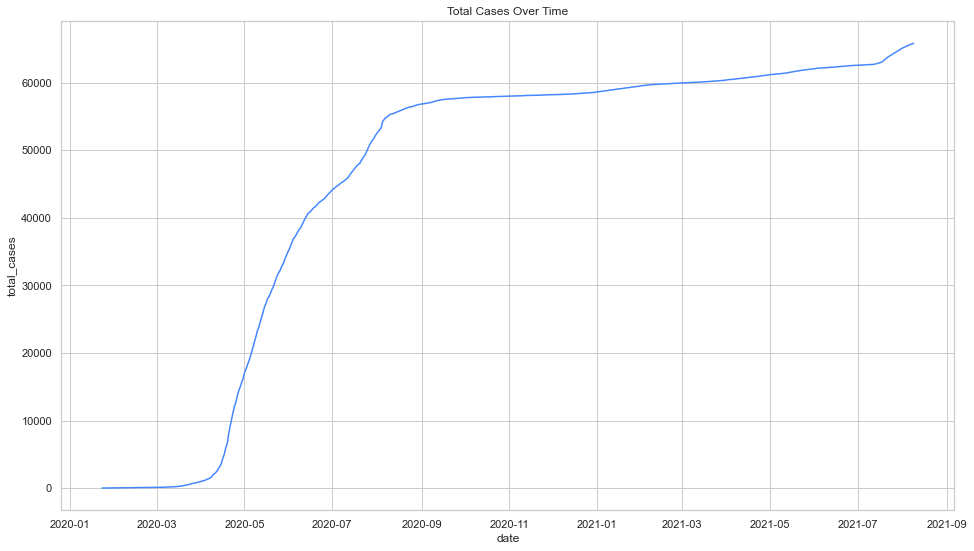

In [9]:
plt.figure(figsize=(16, 9))

sb.set_theme(style='whitegrid')

plt.title('Total Cases Over Time')

sb.lineplot(data=covid, x=covid.index, y='total_cases', color=blue)

plt.show()

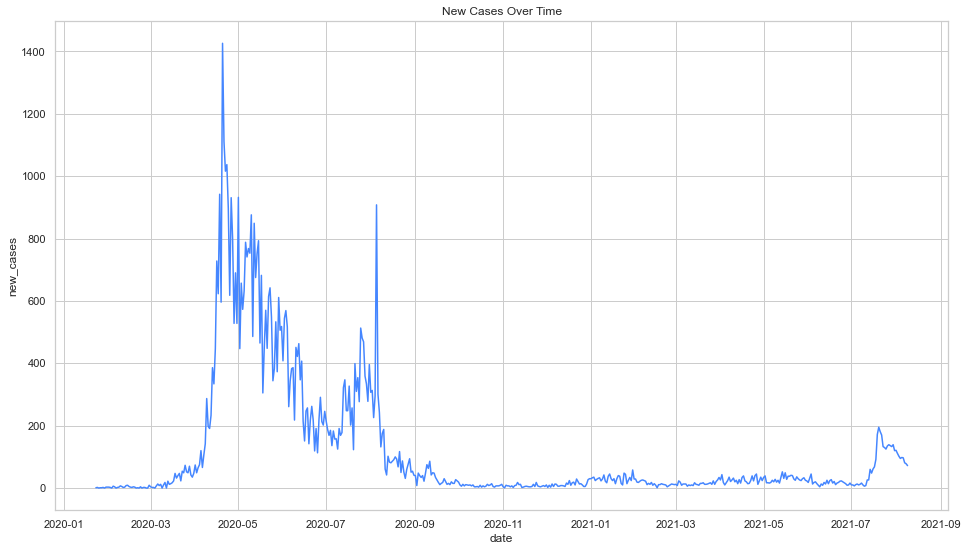

In [10]:
plt.figure(figsize=(16, 9))

sb.set_theme(style='whitegrid')

plt.title('New Cases Over Time')

sb.lineplot(data=covid, x=covid.index, y='new_cases', color=blue)

plt.show()

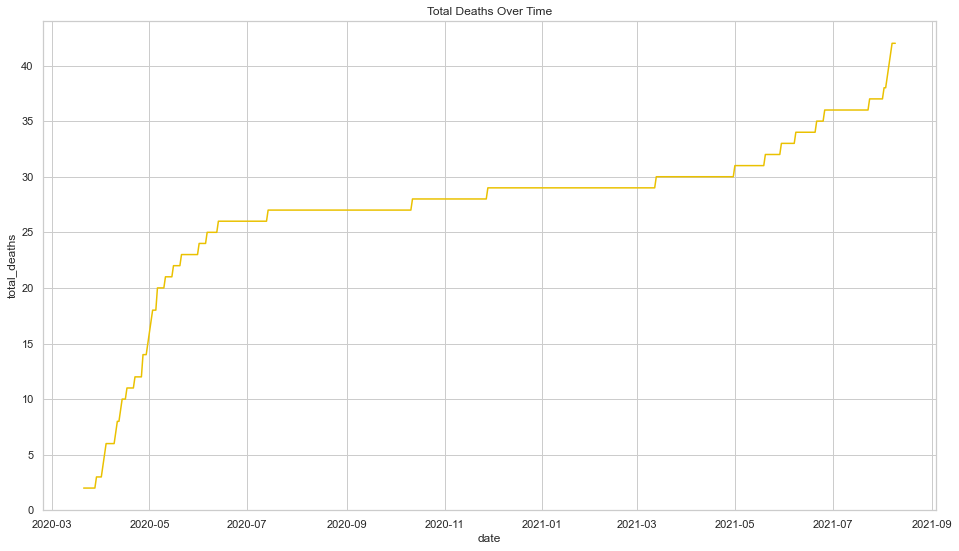

In [11]:
plt.figure(figsize=(16, 9))

sb.set_theme(style='whitegrid')

plt.title('Total Deaths Over Time')

sb.lineplot(data=covid, x=covid.index, y='total_deaths', color=yellow)

plt.show()

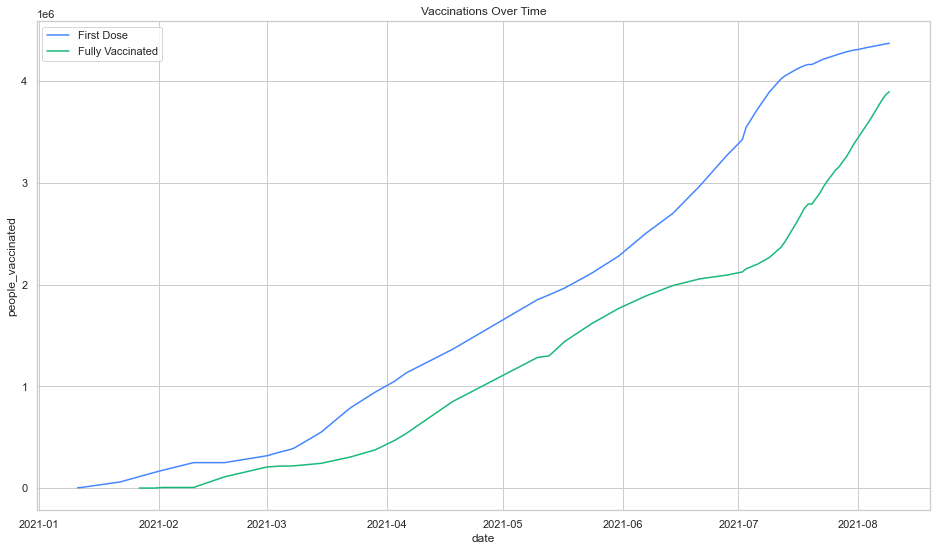

In [12]:
plt.figure(figsize=(16, 9))

sb.set_theme(style='whitegrid')

plt.title('Vaccinations Over Time')

sb.lineplot(data=covid, x=covid.index, y='people_vaccinated', color=blue)
sb.lineplot(data=covid, x=covid.index, y='people_fully_vaccinated', color=green)

plt.legend(labels=['First Dose', 'Fully Vaccinated'])

plt.show()

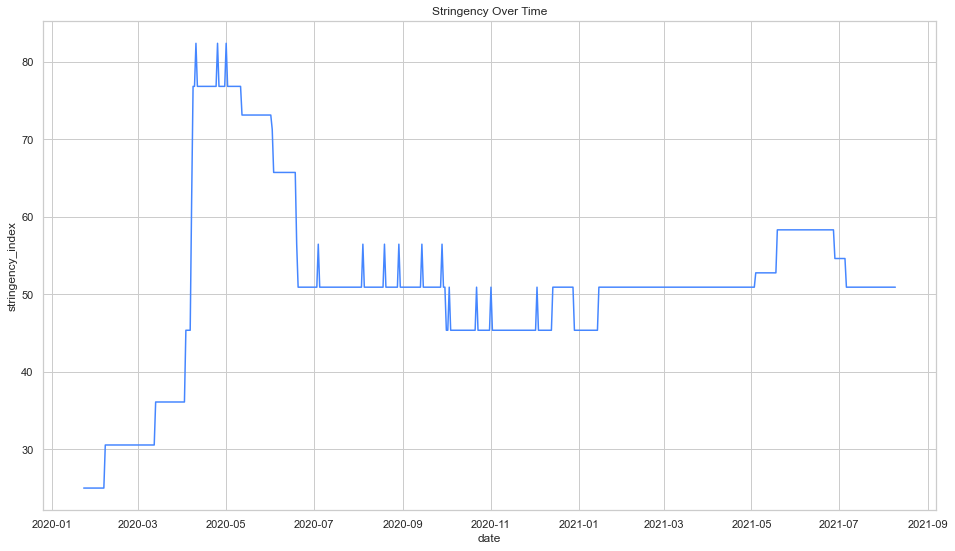

In [13]:
plt.figure(figsize=(16, 9))

sb.set_theme(style='whitegrid')

plt.title('Stringency Over Time')

sb.lineplot(data=covid, x=covid.index, y='stringency_index', color=blue)

plt.show()

---

## Feature Engineering

In [14]:
# Dropping Unecessary Columns
covid_clean = covid[['new_cases', 'new_deaths', 'people_vaccinated', 'people_fully_vaccinated', 'stringency_index']]

In [15]:
covid_clean.loc[:'2021-01-11'] = covid_clean[:'2021-01-11'].fillna(0)

# covid_clean['stringency_index'] = covid_clean['stringency_index'].fillna(method='bfill')
covid_clean = covid_clean.fillna(method='ffill')

C:\Users\ozkzh\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\ozkzh\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [16]:
covid_train, covid_test = covid_clean[:-28], covid_clean[-28:]

---

## Simple Moving Average

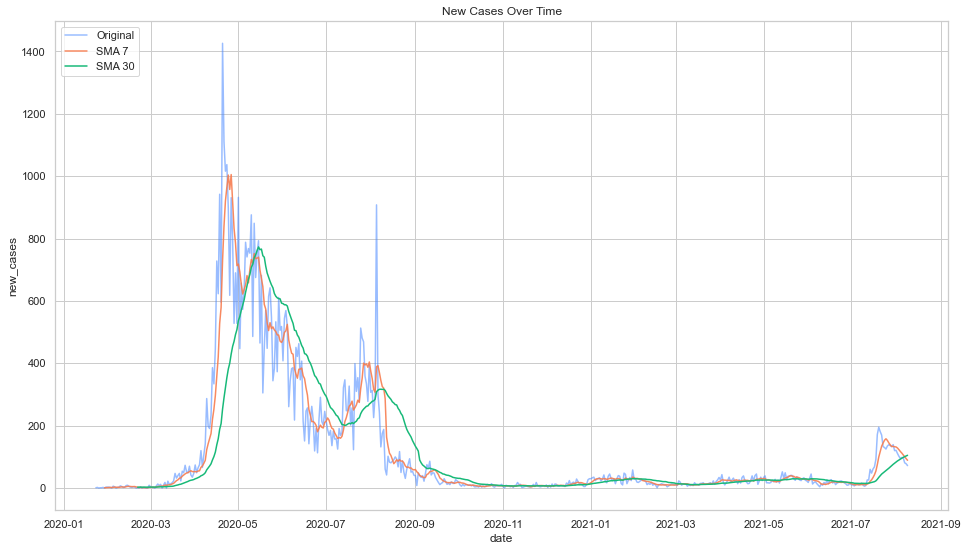

In [17]:
plt.figure(figsize=(16,9))

case_7 = covid_clean.rolling(window=7).mean()
case_30 = covid_clean.rolling(window=30).mean()

plt.title('New Cases Over Time')

sb.lineplot(data=covid_clean, x=covid_clean.index, y='new_cases', color=blue, alpha=0.55)
sb.lineplot(data=case_7, x=covid_clean.index, y='new_cases', color=orange, alpha=0.89)
sb.lineplot(data=case_30, x=covid_clean.index, y='new_cases', color=green)

# ax.xaxis.set_major_locator(mtd.MonthLocator(interval=2))
plt.legend(labels=['Original', 'SMA 7', 'SMA 30'], loc='upper left')

plt.show()

---

# Modelling
As we are attempting to carry out bivariate time series, ARIMA cannot be used. Instead Vector Auto Regressor has to be used. To experiment the capabilities of the Vector Auto Regressor, we will also be attempting to train 2 ARIMA models, one for each Target Variable. Factors like model training time will be factored in other than RMSE.   
Due to the limitations of the Vector Auto Regressor, we are hardly unable to tune the model. Hence, the tests and analysis below (specifically the ACF and PACF plots) will be carried out for ARIMA only.

In [18]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.varmax import VARMAX

In [19]:
cols = ['new_deaths', 'new_cases']

X = covid_train.drop(columns=cols)
y = covid_train[cols]

# Vector Auto Regressor Moving Average
Before we actually get into the modelling and fitting the training data, we should first identify 2 main values.   
VARMA standas for Vector Auto Regressive Moving Average. Breaking the terms down, there are 2 components in VARMA for us to configure.   

$$VARMA (p, q)$$   
<div style="display: flex; justify-content:center;">
    <p>
        Where: <br>
        p is the order of the Auto Regressive Component <br>
        q is the order of the Moving Average Component
    </p>
</div>

As time is limitted, hyper tuning the model is not an option. Hence, these values shall be determined with various tests and plots for both speed and accuracy.   

Choosing the *(p, q)* values is largely attributed to both the Tutorial 7 slides [Time series Forecasting - ARIMA models](https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06) article, [Time Series Analysis: Identifying AR and MA using ACF and PACF Plots](https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8) article and [Forecasting Using Arima Models In Python](https://s3.amazonaws.com/assets.datacamp.com/production/course_17329/slides/chapter3.pdf) resource from datacamp.

## Granger's Causality Test
VARMA works on the assumption that the predicted variables influences each other. To test if the variables do indeed affect each other, the Granger's Causality test can be applied to check if a pair of variables influence one another.

In [20]:
maxlag = 12

test_result = grangercausalitytests(covid_train[['new_cases', 'new_deaths']], maxlag=maxlag, verbose=False)
p_values = [round(test_result[i+1][0]['ssr_chi2test'][1],4) for i in range(maxlag)]

print('Granger Causality Tests wether New Deaths causes New Cases')
print('P-Value:', np.min(p_values))



test_result = grangercausalitytests(covid_train[['new_deaths', 'new_cases']], maxlag=maxlag, verbose=False)
p_values = [round(test_result[i+1][0]['ssr_chi2test'][1],4) for i in range(maxlag)]

print('Granger Causality Tests wether New Cases causes New Deaths')
print('P-Value:', np.min(p_values))

Granger Causality Tests wether New Deaths causes New Cases
P-Value: 0.0
Granger Causality Tests wether New Cases causes New Deaths
P-Value: 0.0


#### Analysis
H<sub>0</sub>: The Latter does not Granger cause the Former<br>
H<sub>1</sub>: The Latter Granger causes the Former   

As both P-values are less than 0.05, the null hypothesis is rejected and we can conclude that New Cases Granger causes New Deaths and Vice-Versa.

---

## Cointegration Test
Vector Auto Regression also assumes that the predicted values have a long running statistically significant relationship. A Cointegration Test is to test this relationship.

In [21]:
coin_test = {
    'Column': [],
    'Test Statistic': [],
    'Critical Value (95%)': [],
    'Significant': []
}

result = coint_johansen(covid_train[cols], -1, 5)

for i in range(2):
    test_stat, crit_val = round(result.lr1[i], 3), round(result.cvt[:,1][i], 3)
    coin_test['Column'].append(cols[i])
    coin_test['Test Statistic'].append(test_stat)
    coin_test['Critical Value (95%)'].append(crit_val)
    coin_test['Significant'].append(test_stat > crit_val)

pd.DataFrame(coin_test)

,Column,Test Statistic,Critical Value (95%),Significant
0,new_deaths,67.183,12.321,True
1,new_cases,3.764,4.130,False


#### Analysis
Since both test statistics are more than the critical value, we can conclude that the variables have a long 
running significant relationship.

---

## Stationary Test
Like the ARIMA model and other time series models, Vector Auto Regressor also requires the data to be stationary.

In [22]:
adful_test = {
    'Column': [],
    'N': [],
    'P-Value': [],
}

for col in cols:
    _, pvalue, _, n, _, _ = adfuller(covid_train[col])

    adful_test['Column'] = np.append(adful_test['Column'], col)
    adful_test['N'] = np.append(adful_test['N'], n)
    adful_test['P-Value'] = np.append(adful_test['P-Value'], round(pvalue, 3))

pd.DataFrame(adful_test)

,Column,N,P-Value
0,new_deaths,518.0,0.115
1,new_cases,523.0,0.247


H<sub>0</sub>: Non Stationary <br>
H<sub>1</sub>: Stationary   

Since the both columns P-value is more than 0.05, we cannot reject the null hypothesis. As a result, we conclude that both columns are non stationary.   

As a result, we need to difference the dataset.

In [23]:
covid_train_diff = covid_train.diff().dropna()

In [24]:
adful_test = {
    'Column': [],
    'N': [],
    'P-Value': [],
}

for col in cols:
    _, pvalue, _, n, _, _ = adfuller(covid_train_diff[col])

    adful_test['Column'] = np.append(adful_test['Column'], col)
    adful_test['N'] = np.append(adful_test['N'], n)
    adful_test['P-Value'] = np.append(adful_test['P-Value'], round(pvalue, 3))

pd.DataFrame(adful_test)

,Column,N,P-Value
0,new_deaths,518.0,0.0
1,new_cases,523.0,0.0


H<sub>0</sub>: Non Stationary <br>
H<sub>1</sub>: Stationary   

After differencing, both column's P-value are all less than 0.05, hence, we reject the null hypothesis and we conclude that both columns are stationary.   

---

## ACF and PACF Plot
The stationary test is used to determine the *p*, order of Auto Regressor in the Vector Auto Regressor model.

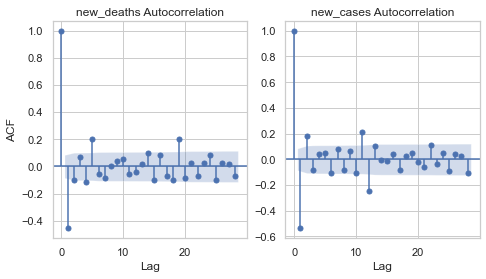

In [25]:
plt.figure(figsize=(16,4))
sb.set_theme(style='whitegrid')

i = 0
for col in cols:
    ax = plt.subplot(int('14' + str(i + 1)))
    plot_acf(covid_train_diff[col], ax=ax)
    ax.set_title(f'{col} Autocorrelation')
    ax.set_xlabel('Lag')

    if i == 0:
        ax.set_ylabel('ACF')

    i = i+1

plt.show()

#### Analysis
The first lag value has a value of positive 1. The lags also shows a gradual decrease (decays) towards 0.   
With this current understanding, we would stick to a Auto Regressive (p) model with Moving Average (q) set to 0.   
The ACF decreases significantly after 2 lags.

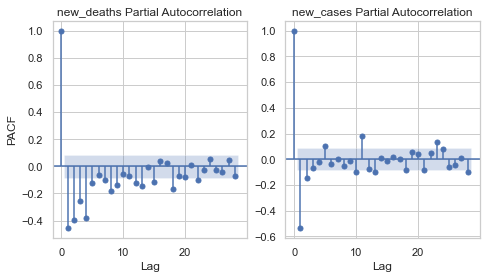

In [26]:
plt.figure(figsize=(16,4))
sb.set_theme(style='whitegrid')

i = 0
for col in cols:
    ax = plt.subplot(int('14' + str(i + 1)))
    plot_pacf(covid_train_diff[col], ax=ax)
    ax.set_title(f'{col} Partial Autocorrelation')
    ax.set_xlabel('Lag')

    if i == 0:
        ax.set_ylabel('PACF')

    i = i+1

plt.show()

#### Analysis
The Partial Autocorrelation plot, gradually decrease (decays) towards 0. With this understanding, we will have to use both the Auto Regressive (p) model with the Moving Average Model (2).   
The PACF decreases towards 0 after 2 lags.

### Conclusion
From the Seasonal Auto Correlation plot and Seasonal Partial Auto Correlation plot, we can conclude that *p*, the Seasonal Auto Regressive order value should be 2 and *q*, the Seasonal Moving Average value should be set to 2.   

---

In [27]:
import warnings
warnings.filterwarnings('ignore')

tscv = TimeSeriesSplit(n_splits=5)

In [28]:
results = {
    'Train RMSE': [],
    'Validate RMSE': [],
    'AIC': [],
    'BIC': [],
}

for train_idx, val_idx in tscv.split(X):
    x_train, x_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = VARMAX(endog=y_train, exog=x_train, freq='D', enforce_stationarity=True).fit()
    y_pred_train = model.predict(start=x_train.index.values[0], end=x_train.index.values[-1], exog=x_train)
    y_pred_val = model.predict(start=x_val.index.values[0], end=x_val.index.values[-1], exog=x_val)

    results['Train RMSE'].append(mean_squared_error(y_train, y_pred_train, squared=False))
    results['Validate RMSE'].append(mean_squared_error(y_val, y_pred_val, squared=False))
    results['AIC'].append(model.aic)
    results['BIC'].append(model.bic)

temp_result = pd.DataFrame(results)
print(temp_result.mean())
print(display(temp_result))

Train RMSE         53.958269
Validate RMSE     835.923344
AIC              3416.332819
BIC              3468.253289
dtype: float64


,Train RMSE,Validate RMSE,AIC,BIC
0,53.195034,108.337235,1209.917464,1247.744293
1,60.968332,100.082067,2445.663249,2493.640705
2,58.210317,69.230483,3519.757902,3573.734231
3,51.233032,3802.129316,4489.183893,4547.433729
4,46.184629,99.837617,5417.141589,5478.713488


None


In [29]:
results = {
    'Train RMSE': [],
    'Validate RMSE': [],
    'AIC': [],
    'BIC': [],
}

for train_idx, val_idx in tscv.split(X):
    x_train, x_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = VARMAX(endog=y_train, exog=x_train, freq='D', enforce_stationarity=True, order=(2, 2)).fit()
    y_pred_train = model.predict(start=x_train.index.values[0], end=x_train.index.values[-1], exog=x_train)
    y_pred_val = model.predict(start=x_val.index.values[0], end=x_val.index.values[-1], exog=x_val)

    results['Train RMSE'].append(mean_squared_error(y_train, y_pred_train, squared=False))
    results['Validate RMSE'].append(mean_squared_error(y_val, y_pred_val, squared=False))
    results['AIC'].append(model.aic)
    results['BIC'].append(model.bic)

temp_result = pd.DataFrame(results)
print(temp_result.mean())
print(display(temp_result))

Train RMSE         46.853044
Validate RMSE     785.304258
AIC              3368.091832
BIC              3461.548677
dtype: float64


,Train RMSE,Validate RMSE,AIC,BIC
0,43.245092,364.625277,1193.293987,1261.382279
1,53.396250,101.642087,2419.627307,2505.986726
2,51.725343,67.907937,3478.564257,3575.721650
3,45.237918,3300.764207,4422.631149,4527.480853
4,40.660617,91.581782,5326.342462,5437.171879


None


---

Before we actually get into the modelling and fitting the training data, we should first identify 3 main values.   
ARIMA standas for Auto Regressive Integrated Moving Average. Breaking the terms down, there are 3 components in ARIMA for us to configure.   

$$ARIMA (p, d, q)$$   
<div style="display: flex; justify-content:center;">
    <p>
        Where: <br>
        p is the order of the Auto Regressive Component <br>
        d is the number of Differencing used <br>
        q is the order of the Moving Average Component
    </p>
</div>

As time is limitted, hyper tuning the model is not an option. Hence, these values shall be determined with various tests and plots for both speed and accuracy.   

Choosing the *(p, d, q)* values is largely attributed to both the Tutorial 7 slides [Time series Forecasting - ARIMA models](https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06) article, [Time Series Analysis: Identifying AR and MA using ACF and PACF Plots](https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8) article and [Forecasting Using Arima Models In Python](https://s3.amazonaws.com/assets.datacamp.com/production/course_17329/slides/chapter3.pdf) resource from datacamp.

Based on the statistical analysis above, we can conclude that the values for *(p, d, q)* are *(2, 1, 2)*.   

The only extra thing to do as of now is to check if the data has any seasonality.

## Seasonal Decomposition
This section is to test if the data has any seasonality. As there is no Seasonal VARMA, this test is only done for the ARIMA model. If seasonality is present, we will use SARIMA instead.

In some datasets, the data tends to have a season patern. Instantiating seasonal order helps the model to better predict the values. To do so, we can use SARMIA or Seasonal ARIMA.   

$$ARIMA (p, d, q) => ARIMA (p, d, q)(P, D, Q, m)$$   
<div style="display: flex; justify-content:center;">
    <p>
        Where: <br>
        p is the order of the Auto Regressive Component <br>
        d is the number of Differencing used <br>
        q is the order of the Moving Average Component <br>
        <br>
        And,<br>
        P is the order of the Seasonal Auto Regressive Component <br>
        D is the number of Seasonal Differencing used <br>
        Q is the order of the Seasonal Moving Average Component <br>
        m is the number of periods for each season
    </p>
</div>

Once again as time is limitted, hyper tuning the model is not an option. Hence, the seasonal values with various tests and plots for both speed and accuracy.   
Choosing (P, D, Q, m) is largely attributed to Tutorial 7 slides, the linked above, [ARIMA/SARIMA with Python](https://www.datasciencesmachinelearning.com/2019/01/arimasarima-in-python.html) article and [Forecasting Using Arima Models In Python - Chapter 4](https://s3.amazonaws.com/assets.datacamp.com/production/course_17329/slides/chapter4.pdf)

> ### *We shall first test for seasonality*

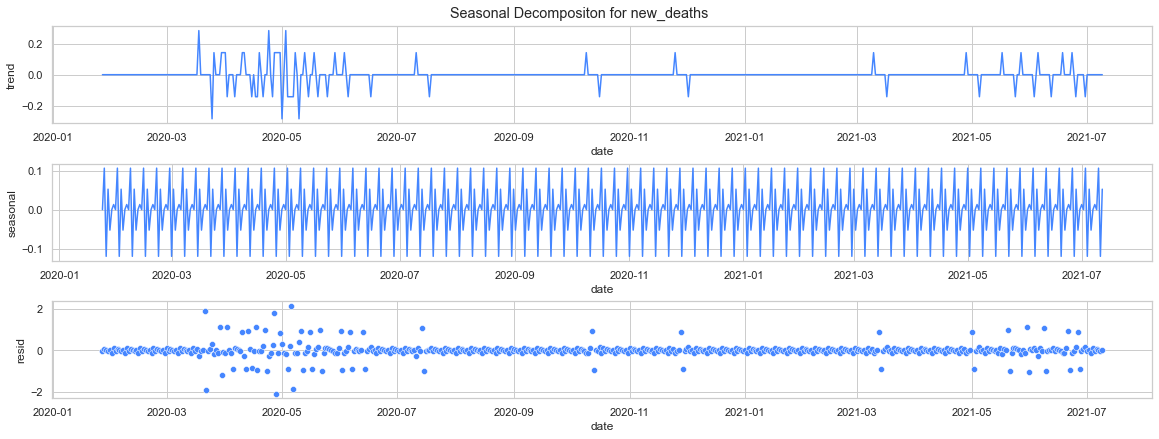

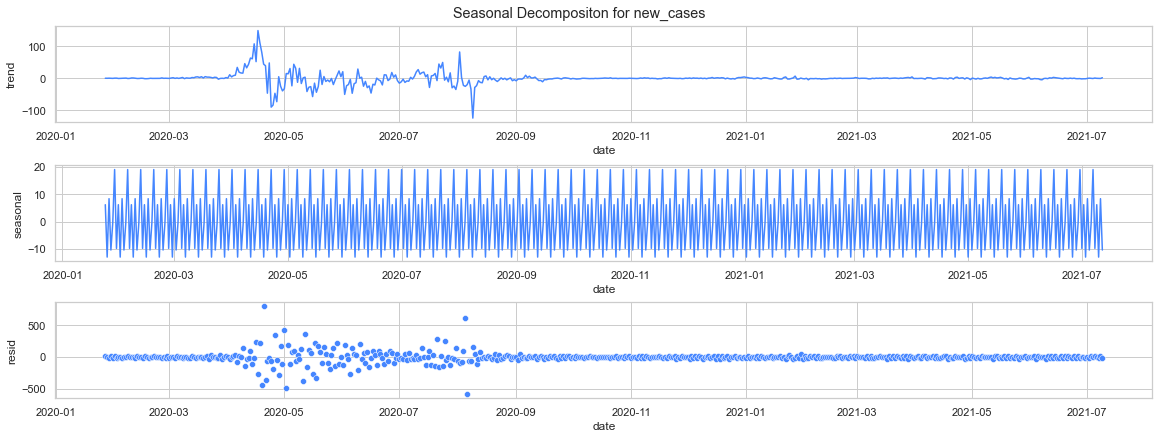

In [30]:
seasonal = {}
sb.set_theme(style='whitegrid')

for col in cols:
    dec = seasonal_decompose(covid_train_diff[col], 'additive')

    plt.figure(figsize=(16, 6), constrained_layout=True)
    plt.suptitle(f'Seasonal Decompositon for {col}')

    plt.subplot(311)
    sb.lineplot(data=pd.DataFrame(dec.trend).reset_index(), x='date', y='trend', color=blue)

    plt.subplot(312)
    sb.lineplot(data=pd.DataFrame(dec.seasonal).reset_index(), x='date', y='seasonal', color=blue)

    plt.subplot(313)
    sb.scatterplot(data=pd.DataFrame(dec.resid).reset_index(), x='date', y='resid', color=blue)

    seasonal[col] = dec.seasonal

    plt.show()

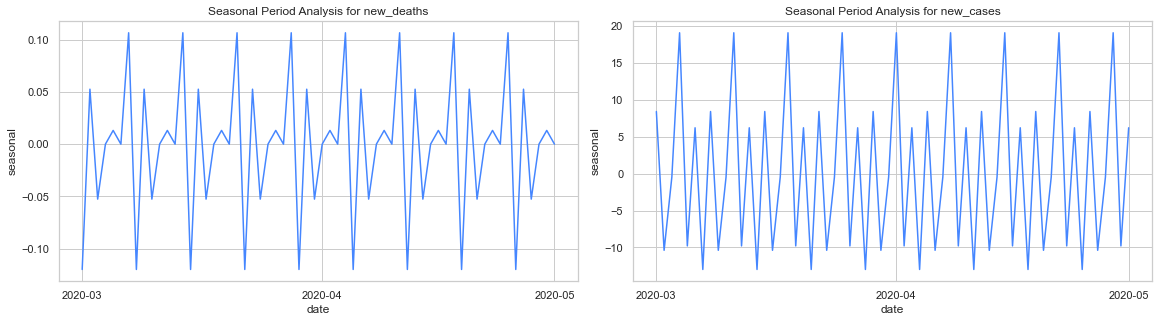

In [31]:
plt.figure(figsize=(16, 8), constrained_layout=True)
sb.set_theme(style='whitegrid')

for i in range(2):
    season = pd.DataFrame(seasonal[cols[i]])['2020-03-01':'2020-05-01']

    ax = plt.subplot(int('22' + str(i + 1)))
    plt.title(f'Seasonal Period Analysis for {cols[i]}')
    sb.lineplot(data=season, x='date', y='seasonal', color=blue)
    ax.xaxis.set_major_locator(mtd.MonthLocator())
    # plt.xticks(np.arange(0,3000,1000), labels=['01/04/2004', '01/05/2004', '01/06/2004'])

plt.show()

#### Analysis
From the 2 Seasonal Plots, we can conclude that there are about 4 intervals in one month. This means, each interval is about 7 days.   

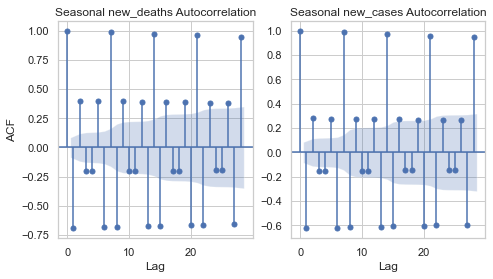

In [32]:
plt.figure(figsize=(16,4))
sb.set_theme(style='whitegrid')

for i in range(2):
    season = seasonal[cols[i]]

    ax = plt.subplot(int('14' + str(i + 1)))
    plot_acf(season, ax=ax)
    ax.set_title(f'Seasonal {cols[i]} Autocorrelation')
    ax.set_xlabel('Lag')

    if i == 0:
        ax.set_ylabel('ACF')

plt.show()

#### Analysis
From the Auto Correlation plot, we can see a full cycle every 7 lags.

### Conclusion
Hence we can conclude the number of periods *m*, in *(P, D, Q, m)* is 7.

---

## Seasonality Stationary Test
The stationary test is used to determine the *D* value of the *(P, D, Q, m)* in ARIMA. As time series works best with stationary datasets.   

In [33]:
adful_test = {
    'Gas': [],
    'N': [],
    'P-Value': [],
}

for i in range(2):
    season = seasonal[cols[i]]

    _, pvalue, _, n, _, _ = adfuller(season)

    adful_test['Gas'] = np.append(adful_test['Gas'], cols[i])
    adful_test['N'] = np.append(adful_test['N'], n)
    adful_test['P-Value'] = np.append(adful_test['P-Value'], round(pvalue, 3))

pd.DataFrame(adful_test)

,Gas,N,P-Value
0,new_deaths,523.0,0.0
1,new_cases,516.0,0.0


H<sub>0</sub>: Non Stationary <br>
H<sub>1</sub>: Stationary   

As the gasses season P-value are all less than 0.05, we reject the null hypothesis and we conclude that the gasses season are all stationary.   

### Conclusion
Based on the 2 tests, we can conclude all seasonal variables are stationary.   
Hence, **no Differencing** is needed and Seasonal Differencing (D) in *(P, D, Q, m)* shall be set to 0.

---

## ACF and PACF Plots
The stationary test is used to determine the *P* and *Q* value of the *(P, D, Q, m)* in ARIMA. These values are vital as it determines the order of Seasonal Auto Regressive and Seasonal Moving Average to use. These values would largely impact the end model and hence choosing the correct values is very important.   
Since m is 8, we will plot ACF and PACF plots with intervals of 8.

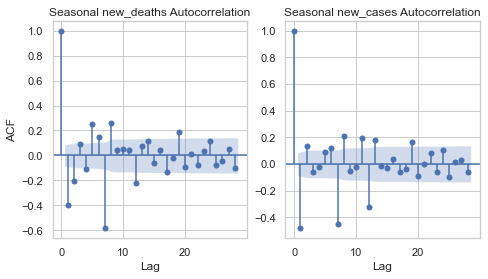

In [34]:
plt.figure(figsize=(16,4))
sb.set_theme(style='whitegrid')

for i in range(2):
    new_covid = covid_train_diff[cols[i]]
    new_covid = new_covid.diff(7).dropna()

    ax = plt.subplot(int('14' + str(i + 1)))
    plot_acf(new_covid, ax=ax)
    ax.set_title(f'Seasonal {cols[i]} Autocorrelation')
    ax.set_xlabel('Lag')

    if i == 0:
        ax.set_ylabel('ACF')

plt.show()

#### Analysis
The first lag value has a value of positive 1. The lags also shows a gradual decrease (decays) towards 0.   
With this current understanding, we would stick to a Auto Regressive (P) model with Moving Average (Q) set to 0.   
The ACF decreases towards 0 after 2 lags.

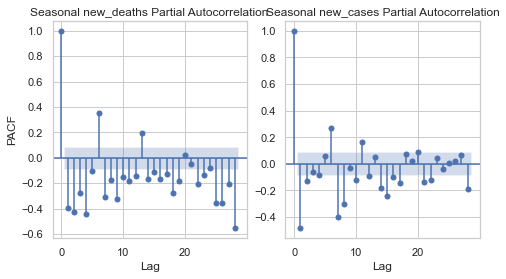

In [35]:
plt.figure(figsize=(16,4))
sb.set_theme(style='whitegrid')

for i in range(2):
    new_covid = covid_train_diff[cols[i]]
    new_covid = new_covid.diff(7).dropna()

    ax = plt.subplot(int('14' + str(i + 1)))
    plot_pacf(new_covid, ax=ax)
    ax.set_title(f'Seasonal {cols[i]} Partial Autocorrelation')
    ax.set_xlabel('Lag')

    if i == 0:
        ax.set_ylabel('PACF')

plt.show()

#### Analysis
The Partial Autocorrelation plot, gradually decrease (decays) towards 0. With this understanding, we will have to use both the Auto Regressive (P) model with the Moving Average Model (Q).   
The PACF decreases towards 0 after 2 lags.

---

In [36]:
results = {
    'y col': [],
    'Train RMSE': [],
    'Validate RMSE': [],
    'AIC': [],
    'BIC': [],
}


for train_idx, val_idx in tscv.split(X):
    x_train, x_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    for col in cols:
        model = ARIMA(endog=y_train[col], exog=x_train, freq='D').fit()
        y_pred_train = model.predict(start=x_train.index.values[0], end=x_train.index.values[-1], 
            exog=x_train)
        y_pred_val = model.predict(start=x_val.index.values[0], end=x_val.index.values[-1], exog=x_val)

        results['y col'].append(col)
        results['Train RMSE'].append(mean_squared_error(y_train[col], y_pred_train, squared=False))
        results['Validate RMSE'].append(mean_squared_error(y_val[col], y_pred_val, squared=False))
        results['AIC'].append(model.aic)
        results['BIC'].append(model.bic)



temp_result = pd.DataFrame(results)
print(temp_result.mean())
print(display(temp_result))

Train RMSE         78.935863
Validate RMSE     885.431316
AIC              2270.136803
BIC              2287.443626
dtype: float64


,y col,Train RMSE,Validate RMSE,AIC,BIC
0,new_deaths,0.342214,0.436898,73.778230,86.387173
1,new_cases,169.523256,138.736257,1215.554872,1228.163815
2,new_deaths,0.383793,0.167366,176.986163,192.978648
3,new_cases,154.394335,199.999449,2347.958350,2363.950835
4,new_deaths,0.325952,0.124269,170.884217,188.876327
5,new_cases,164.688273,140.866980,3532.416200,3550.408310
6,new_deaths,0.288855,6.845962,137.174617,156.591229
7,new_cases,154.928414,8159.254731,4649.645417,4669.062029
8,new_deaths,0.263210,0.305997,2373.331043,2393.855009
9,new_cases,144.220333,207.575246,8023.638922,8044.162888


None


#### Analysis
Validation RMSE is very high. Higher than the baseline VARMA model. Model however have a better fit as compared to the VARMA model considering both AIC and BIC values are significantly lower when compared to the VARMA model

In [37]:
results = {
    'y col': [],
    'Train RMSE': [],
    'Validate RMSE': [],
    'AIC': [],
    'BIC': [],
}

for train_idx, val_idx in tscv.split(X):
    x_train, x_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    for col in cols:
        model = ARIMA(endog=y_train[col], exog=x_train, freq='D', order=(2,1,2)).fit()
        y_pred_train = model.predict(start=x_train.index.values[0], end=x_train.index.values[-1], 
            exog=x_train)
        y_pred_val = model.predict(start=x_val.index.values[0], end=x_val.index.values[-1], exog=x_val)

        results['y col'].append(col)
        results['Train RMSE'].append(mean_squared_error(y_train[col], y_pred_train, squared=False))
        results['Validate RMSE'].append(mean_squared_error(y_val[col], y_pred_val, squared=False))
        results['AIC'].append(model.aic)
        results['BIC'].append(model.bic)

temp_result = pd.DataFrame(results)
print(temp_result.mean())
print(display(temp_result))

Train RMSE         46.863532
Validate RMSE     167.097616
AIC              1670.093590
BIC              1697.744181
dtype: float64


,y col,Train RMSE,Validate RMSE,AIC,BIC
0,new_deaths,0.343860,0.436999,83.757506,103.844382
1,new_cases,78.618076,529.085845,1073.608378,1093.695254
2,new_deaths,0.376577,0.113236,178.534232,204.077887
3,new_cases,110.114734,235.272527,2220.650577,2246.194232
4,new_deaths,0.314991,0.109428,161.113206,189.870897
5,new_cases,105.140322,11.957089,3285.176598,3313.934289
6,new_deaths,0.282479,0.382752,131.454581,162.498845
7,new_cases,91.247772,879.950501,4264.927724,4295.971988
8,new_deaths,0.257617,0.289368,76.846630,109.667099
9,new_cases,81.938897,13.378418,5224.866465,5257.686934


None


#### Analysis
Validate RMSE is significantly lower now with order set. Validation RMSE is even lower than the VARMA model with order. Moreover, model has even better fit as AIC and BIC are significantly lower.

In [38]:
results = {
    'y col': [],
    'Train RMSE': [],
    'Validate RMSE': [],
    'AIC': [],
    'BIC': [],
}

for train_idx, val_idx in tscv.split(X):
    x_train, x_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    for col in cols:
        model = ARIMA(endog=y_train[col], exog=x_train, freq='D', order=(2,1,2), seasonal_order=(2,0,2,7)).fit()
        y_pred_train = model.predict(start=x_train.index.values[0], end=x_train.index.values[-1], 
            exog=x_train)
        y_pred_val = model.predict(start=x_val.index.values[0], end=x_val.index.values[-1], exog=x_val)

        results['y col'].append(col)
        results['Train RMSE'].append(mean_squared_error(y_train[col], y_pred_train, squared=False))
        results['Validate RMSE'].append(mean_squared_error(y_val[col], y_pred_val, squared=False))
        results['AIC'].append(model.aic)
        results['BIC'].append(model.bic)

temp_result = pd.DataFrame(results)
print(temp_result.mean())
print(display(temp_result))

Train RMSE         46.369274
Validate RMSE     122.413501
AIC              1672.948847
BIC              1714.424733
dtype: float64


,y col,Train RMSE,Validate RMSE,AIC,BIC
0,new_deaths,0.339470,0.429142,89.976006,120.106320
1,new_cases,76.112724,332.485464,1078.393975,1108.524289
2,new_deaths,0.367739,0.117759,178.520062,216.835544
3,new_cases,108.473851,252.167485,2224.428152,2262.743634
4,new_deaths,0.307781,0.113207,157.128221,200.264757
5,new_cases,104.761807,14.409354,3291.425446,3334.561983
6,new_deaths,0.278881,0.158053,131.640974,178.207369
7,new_cases,90.927705,609.240788,4270.603684,4317.170080
8,new_deaths,0.254432,0.287304,75.232133,124.462836
9,new_cases,81.868351,14.726454,5232.139817,5281.370520


None


#### Analysis
Validation RMSE is lower when compared to SARIMA model with order only. Model however have slightly worse fit when compared to the ARIMA model with order only.

## Final Model

In [39]:
arima = {}
results = {
    'Variable': [],
    'Train RMSE': [],
    'AIC': [],
    'BIC': [],
}

for col in cols:
    arima[col] = ARIMA(endog=y[col], exog=X, 
        order=(2,0,2), seasonal_order=(2,0,2,7), freq='D').fit()
    y_pred_full = arima[col].predict(start=y.index.values[0], end=y.index.values[-1], exog=X)

    results['Variable'] = np.append(results['Variable'], np.full(1, col))
    results['Train RMSE'].append(mean_squared_error(y[col], y_pred_full, squared=False))
    results['AIC'].append(arima[col].aic)
    results['BIC'].append(arima[col].bic)

temp_result = pd.DataFrame(results)
print(display(temp_result.mean()))
print(display(temp_result))

Train RMSE      39.893806
AIC           3171.127639
BIC           3226.845614
dtype: float64

None


,Variable,Train RMSE,AIC,BIC
0,new_deaths,0.257950,95.057436,150.775411
1,new_cases,79.529663,6247.197842,6302.915817


None


Train RMSE      39.893806
AIC           3171.127639
BIC           3226.845614
Test RMSE      100.921048
dtype: float64

None


,Variable,Train RMSE,AIC,BIC,Test RMSE
0,new_deaths,0.257950,95.057436,150.775411,0.403453
1,new_cases,79.529663,6247.197842,6302.915817,201.438643


None


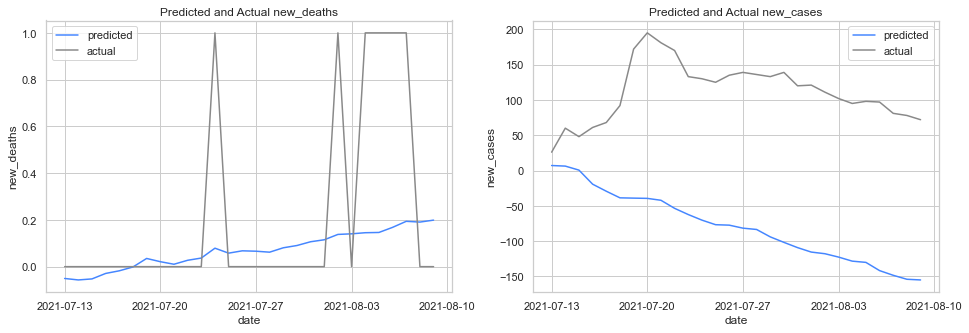

In [40]:
results['Test RMSE'] = []

x_test, y_test = covid_test.drop(columns=cols), covid_test[cols]

plt.figure(figsize=(16, 5))
sb.set_theme(style='whitegrid')

for i in range(2):
    y_test_pred = arima[cols[i]].predict(start=x_test.index.values[0], end=x_test.index[-1], exog=x_test)
    results['Test RMSE'].append(mean_squared_error(y_test[cols[i]], y_test_pred, squared=False))

    ax = plt.subplot(int('12' + str(i + 1)))
    sb.lineplot(data=y_test_pred, color=blue)
    sb.lineplot(data=y_test[cols[i]], color=gray)
    
    plt.title(f'Predicted and Actual {cols[i]}')
    plt.ylabel(cols[i])

    plt.legend(labels=['predicted', 'actual'])
    ax.xaxis.set_major_locator(mtd.WeekdayLocator())

temp_result = pd.DataFrame(results)
print(display(temp_result.mean()))
print(display(temp_result))

plt.show()

#### Analysis
In general, the model is able to forecast the trend of the new cases and deaths. However, it is unable to give precise and accurate forecast.